# Data Argumentation
A common problem, is the amount of data available to enter the models, for models to present the expected results it is necessary for training to occur with a large amount of data (dataset), but in many cases the data needed to perform these tasks is not available.
This is where the **Data Augmentation** technique comes in that, as the name suggests, allows us to augment our dataset in two ways:




*   Introducing disturbances in the original data. For example: taking an original image centered, we replicate it off-center, reversing axes…
*   Using different distributions. Example: if we want to train a model to classify high-resolution images, we add low-resolution images, with noise… always maintaining the highest high-resolution ratio.



At first, neural networks are not intelligent. For example, a poorly trained neural network would think that these three tennis balls shown below are distinct and unique images.

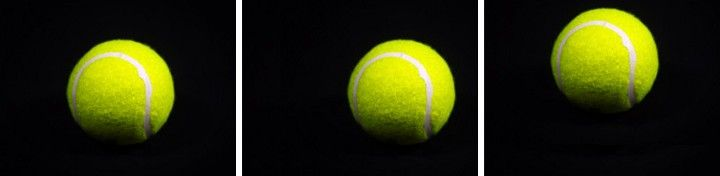



The same ball with some translations.



So if we work with images, it is only necessary to make some small alterations to our dataset and we can achieve our goal.
There are many ways to augment data with images, such as:


1.   Turn around (Flip)
2.   Rotation

1.   Scale
2.   Cutout

1.   Traslation
2.   Gaussian noise









The Keras library provides the ability to use data augmentation automatically when training a model.
This is accomplished by using the ImageDataGenerator class.
A variety of techniques are supported, as well as pixel scaling methods, such as:



*   The changes in the image (translations) through the arguments **width_shift_range** and **height_shift_range**.
*  Turning the image around using the arguments **horizontal_flip** and **vertical_flip**.
*   Image rotations through storyline **rotation_range**
*   Image brightness using the argument **brightness_range**.
*   Image zoom using the argument **zoom_range**.

Extra things that you can do with keras are:

*   Shear Intensity (Shear angle in counter-clockwise direction in degrees) can be modified using the argument **shear_range**
*   Range for random channel shifts using the argument **channel_shift_range**

Let's independently look at examples of images after they have been magnified. It is common to use a variety of augmentation techniques at the same time during training.


In [2]:
import matplotlib.pyplot as plt    #Library that allows graphing, very MATLAB style
import numpy as np                  #Library that allows working with arrangement  
from numpy import expand_dims       #Expand the array shape 
from keras.preprocessing.image import load_img    #From the Keras library for data augmentation, we load the image in the python image library (PIL) format
from keras.preprocessing.image import img_to_array #will take a picture (PIL) and convert it to a matrix. If part of a PNG image, the values within the image will be between 0 and 255.
from keras.preprocessing.image import ImageDataGenerator #will take a picture (PIL) and convert it to a matrix. If part of a PNG image, the values within the image will be between 0 and 255.
from PIL import Image #libreria de imagenes de python
from urllib.request import urlopen #Permite leer una direccion electronica

First we upload an image from the internet

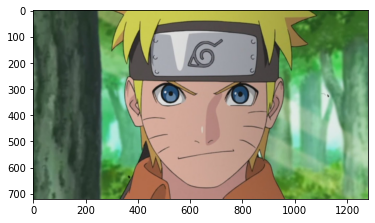

In [3]:
url = 'https://i.ytimg.com/vi/K_JlbZe5D0I/maxresdefault.jpg' 
filename = urlopen(url)
img = Image.open(filename)
plt.imshow(img)

Let's start with a makeover which means moving all the pixels in the image in one direction, such as horizontally or vertically, while keeping the same image dimensions.

The width_shift_range and height_shift_range arguments of the ImageDataGenerator constructor control the amount of horizontal and vertical scrolling respectively.


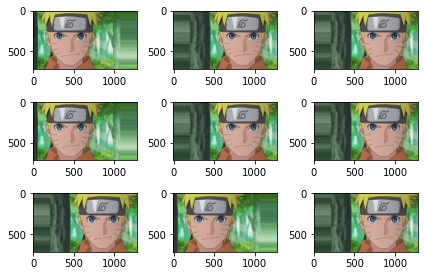

In [4]:
# We convert the image to an arrangement
data = img_to_array(img)
# we make an expansion to a sample 
samples = expand_dims(data, 0)
# We create the data augmenter using only an image change 
datagen = ImageDataGenerator(width_shift_range=[-200,200])
# We prepare the iterator
it = datagen.flow(samples, batch_size=1)
# We generate samples and display the results
for i in range(9):
	plt.subplot(330 + 1 + i)
	# Batches of images are generated
	batch = it.next()
	image = batch[0].astype('uint8') #It is converted to a valid value to be able to be shown as an image 
	plt.imshow(image)
	plt.tight_layout()
plt.show()

An image flip means to invest the rows or columns of pixels in the case of a vertical or horizontal flip, respectively.
The magnification is specified by a Boolean argument **horizontal_flip** or **vertical_flip** for the **ImageDataGenerator** class.

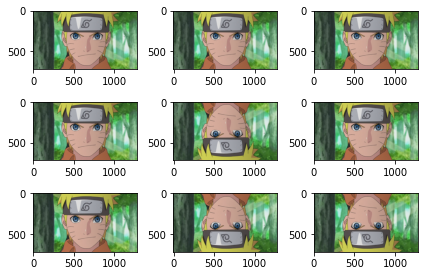

In [6]:
datagen = ImageDataGenerator(vertical_flip=True)
it = datagen.flow(samples, batch_size=1)
for i in range(9):
	plt.subplot(330 + 1 + i)
	batch = it.next()
	image = batch[0].astype('uint8')
	plt.imshow(image)
	plt.tight_layout()
plt.show()

The amount of zoom is sampled randomly from the zoom zone for each dimension (width, height) separate.


Floating or [lower limit, upper limit]. Range for random zoom. If it is a float, [lower bound, upper bound] = [1-zoom_range, 1 + zoom_range]

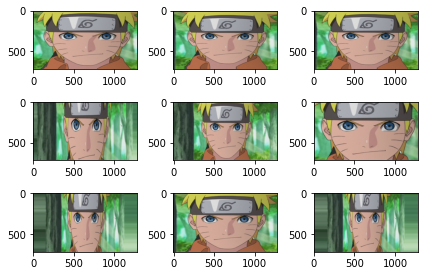

In [ ]:
datagen = ImageDataGenerator(zoom_range=0.5) #float o Rango [lower,upper]
it = datagen.flow(samples, batch_size=1)
for i in range(9):
	plt.subplot(330 + 1 + i)
	batch = it.next()
	image = batch[0].astype('uint8')
	plt.imshow(image)
	plt.tight_layout()
plt.show()

The image is randomly rotated clockwise a determined number of degrees from 0 to 360. It is likely that the pixels rotate outside of the image frame, leaving areas of the frame with no pixel data, which need to be filled.

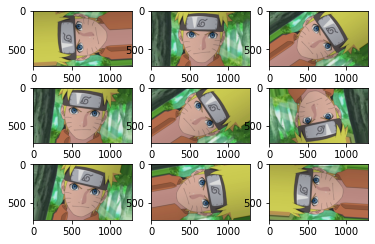

In [ ]:
datagen = ImageDataGenerator(rotation_range=200)
it = datagen.flow(samples, batch_size=1)
for i in range(9):
	plt.subplot(330 + 1 + i)
	batch = it.next()
	image = batch[0].astype('uint8')
	plt.imshow(image)
plt.show()

The combination of these techniques allows us to increase the amount of data in the dataset used, in many jobs a data augmentation is used to increase the amount of training images and improve the precision the job precision.


              featurewise_center: Boleano, poner la media de cada elemento en cero de todos los datos.
              samplewise_center**: Boleano, poener la media del cada muestra a cero
              featurewise_std_normalization: Boleano, Divida las entradas por la desviación estándar (std.) del conjunto de datos, según las características.
              samplewise_std_normalization: Boleano, divide cada dato por su std.
              zca_epsilon: El valor predeterminado es 1e-6.
              zca_whitening: Boleano, indica si se aplica el blanqueo ZCA.      

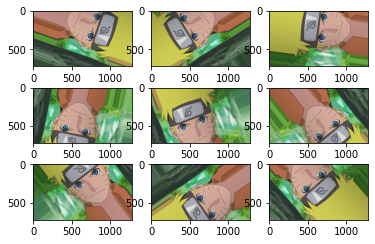

In [ ]:
datagen = ImageDataGenerator(
            rotation_range               = 180,
            width_shift_range            = [100,100],   
            height_shift_range           = [150,150],   
            horizontal_flip              = True,   
            vertical_flip                = True)  
it = datagen.flow(samples, batch_size=1)
for i in range(9):
	plt.subplot(330 + 1 + i)
	batch = it.next()
	image = batch[0].astype('uint8')
	plt.imshow(image)
plt.show()

The image randomly changes the chanel with this argument 

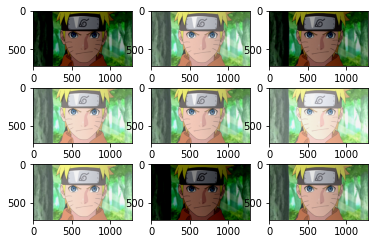

In [50]:
datagen = ImageDataGenerator(channel_shift_range=100)
it = datagen.flow(samples, batch_size=1)
for i in range(9):
	plt.subplot(330 + 1 + i)
	batch = it.next()
	image = batch[0].astype('uint8')
	plt.imshow(image)
plt.show()

The shear intensity is modified with this argument 

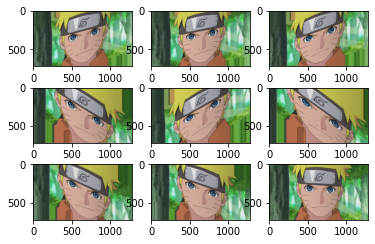

In [51]:
datagen = ImageDataGenerator(shear_range=50)
it = datagen.flow(samples, batch_size=1)
for i in range(9):
	plt.subplot(330 + 1 + i)
	batch = it.next()
	image = batch[0].astype('uint8')
	plt.imshow(image)
plt.show()

Now considering words, the necessary work is not that easy because of the complexity of the language (we cannot replace each word by synonyms and even if we do it, we run the risk that the meaning of the sentence completely changes.
There are some libraries that can help us to do this task, we will start analyzing the following:


1.   Text Attack
2.   Google Trans

# TextAttack
It is a Python framework for adversary attacks, adversary training, and data augmentation in NLP. We will focus only on data augmentation.

In [ ]:
!pip install textattack

     |████████████████████████████████| 327kB 2.6MB/s 
     |████████████████████████████████| 778kB 18.9MB/s 
     |████████████████████████████████| 686kB 21.3MB/s 
     |████████████████████████████████| 61kB 7.1MB/s 
     |████████████████████████████████| 317kB 22.5MB/s 
     |████████████████████████████████| 153kB 26.0MB/s 
     |████████████████████████████████| 235kB 42.3MB/s 
     |████████████████████████████████| 245kB 25.7MB/s 
     |████████████████████████████████| 61kB 6.9MB/s 
     |████████████████████████████████| 1.7MB 33.4MB/s 
     |████████████████████████████████| 3.0MB 46.5MB/s 
     |████████████████████████████████| 1.1MB 43.4MB/s 
     |████████████████████████████████| 102kB 10.6MB/s 
     |████████████████████████████████| 204kB 33.9MB/s 
     |████████████████████████████████| 245kB 43.3MB/s 
     |████████████████████████████████| 17.3MB 204kB/s 
     |████████████████████████████████| 71kB 7.9MB/s 
     |████████████████████████████████| 276kB 36.9MB/s 

In [ ]:
from textattack.augmentation import WordNetAugmenter, EmbeddingAugmenter, EasyDataAugmenter, CharSwapAugmenter

textattack: Updating TextAttack package dependencies.
textattack: Downloading NLTK required packages.


[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package omw to /root/nltk_data...
[nltk_data]   Unzipping corpora/omw.zip.
[nltk_data] Downloading package universal_tagset to /root/nltk_data...
[nltk_data]   Unzipping taggers/universal_tagset.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


2020-10-17 01:43:50 INFO: Downloading default packages for language: en (English)...
2020-10-17 01:45:08 INFO: Finished downloading models and saved to /root/stanza_resources.
wandb: WARNING W&B installed but not logged in.  Run `wandb login` or set the WANDB_API_KEY env variable.


In [ ]:
text = "We all have problems, and we must solve them together or we die alone."

TextAttack provides us four methods for data augmentation.


## WordNetAugmenter
Increases the text by replacing it with synonyms from the WordNet thesaurus (dictionary of synonyms).

WordNet is a English lexical database. Nouns, verbs, adjectives, and adverbs are grouped into sets of cognitive synonyms (synsets), each of which expresses a different concept.
WordNet superficially seems as a thesaurus, because groups words based on their meaning.


In [ ]:
aug = WordNetAugmenter();
aug.augment(text)

['We all have problems, and we must clear them together or we die alone.']


## EmbeddingAugmenter
 Increases the text by transforming words with their inlays, with a constraint to ensure that their cosine similarity is at least 0.8.


In [ ]:
aug = EmbeddingAugmenter();
aug.augment(text)

['We all have troubles, and we must solve them together or we die alone.']

## CharSwapAugmenter
Increases the text by replacing, deleting, inserting and swapping adjacent characters.

In [ ]:
aug = CharSwapAugmenter()
aug.augment(text)

['We all have problems, and we must solve them together or we die aolne.']


## EasyDataAugmenter
This increases the text with a combination of Wordnet synonym replacement, word deletion, word order changes, and synonym insertions. All these 4 functionalities occur randomly. So we will get different results every time we run the code. This returns 4 augmented results, unlike the other methods.


In [ ]:
aug = EasyDataAugmenter()
aug.augment(text)

['We all have problems, and must solve them together or we die alone.',
 'We all have problems, and we must solve them unitedly or we die alone.',
 'We all have problems, and we totally must solve them together or we die alone.',
 'we all have problems, and We must solve them together or we die alone.']

Googletrans  uses the API Ajax of Google Translate for the detection and translation of languages.

The key parameters for the method **translate ()** are:



1.   **src**: origin language. this parameter is optional because **googletrans** will detect it.
2.   **dest**: destination language. Mandatory parameter.

1.   **text**: The text that is going to be translated from the origin language to the destination language. Mandatory parameter }.





 



Using this method what happens is a retranslation, we go from the origin language to a destination language and then we return to the origin, during this backtranslation, there is a slight change in the sentence between the origin text and the backtranslated text, but the general meaning of the sentence is still preserved.

The supported languages can be found at https://cloud.google.com/translate/docs/languages?hl=es

To obtain the best results, it is recommended to do some tests with the languages, if the destination language is very similar, the translation does not lose information. However, there may be a mistake that is that the translation is too literal, this becomes a bit of a problem of try and failure.


Some language examples:


*   Afrikaans	'af'

*   Chinese (simplificado) 	'zh-CN o zh'

*   Esperanto	'eo'

*   Japanese	'ja'

*   Latin	'la'

*   Spanish	'es'

*   Turkmen	'tk'

*   Yiddish	'yi'

*   Zulu	'zu'



In [ ]:
!pip install googletrans

     |████████████████████████████████| 61kB 2.9MB/s 
     |████████████████████████████████| 51kB 5.8MB/s 
     |████████████████████████████████| 972kB 7.7MB/s 
     |████████████████████████████████| 71kB 8.9MB/s 
     |████████████████████████████████| 61kB 7.3MB/s 
     |████████████████████████████████| 102kB 11.2MB/s 
  Created wheel for googletrans: filename=googletrans-3.0.0-cp36-none-any.whl size=15736 sha256=66e24a1bc06cef5fd1b185cbb6cd54b293ee9f0c72d26dcd44e6911b37c94d02
  Stored in directory: /root/.cache/pip/wheels/28/1a/a7/eaf4d7a3417a0c65796c547cff4deb6d79c7d14c2abd29273e
  Created wheel for contextvars: filename=contextvars-2.4-cp36-none-any.whl size=7666 sha256=c0fe899f4e854dd6daf186a58371435919fcace178ecb0ff53bdf4fbc00965c1
  Stored in directory: /root/.cache/pip/wheels/a5/7d/68/1ebae2668bda2228686e3c1cf16f2c2384cea6e9334ad5f6de
Successfully built googletrans contextvars


In [ ]:
from googletrans import Translator
translator = Translator()

In [ ]:
origin_text = "Those who brake the rules are scum, but those who abandon their friends are worse than scum."
text_trans = translator.translate(text=origin_text, dest='af').text
final=translator.translate(text=text_trans, dest='en').text
print(origin_text)
print(text_trans)
print(final)

Those who brake the rules are scum, but those who abandon their friends are worse than scum.
Diegene wat die reëls nakom, is skuim, maar diegene wat hul vriende verlaat, is erger as skuim.
Those who follow the rules are foam, but those who leave their friends are worse than foam.


In [ ]:
origin_text = "Those who brake the rules are scum, but those who abandon their friends are worse than scum."
text_trans = translator.translate(text=origin_text, dest='zh-CN').text
final=translator.translate(text=text_trans, dest='en').text
print(origin_text)
print(text_trans)
print(final)

Those who brake the rules are scum, but those who abandon their friends are worse than scum.
那些违反规则的人是败类，但是那些放弃朋友的人比败类更糟。
Those who break the rules are scum, but those who give up friends are worse than scum.


In [ ]:
origin_text = "Those who brake the rules are scum, but those who abandon their friends are worse than scum."
text_trans = translator.translate(text=origin_text, dest='eo').text
final=translator.translate(text=text_trans, dest='en').text
print(origin_text)
print(text_trans)
print(final)

Those who brake the rules are scum, but those who abandon their friends are worse than scum.
Tiuj, kiuj malobservas la regulojn, estas ŝaŭmo, sed tiuj, kiuj forlasas siajn amikojn, estas pli malbonaj ol ŝaŭmo.
Those who break the rules are foam, but those who abandon their friends are worse than foam.


In [ ]:
origin_text = "Those who brake the rules are scum, but those who abandon their friends are worse than scum."
text_trans = translator.translate(text=origin_text, dest='ja').text
final=translator.translate(text=text_trans, dest='en').text
print(origin_text)
print(text_trans)
print(final)

Those who brake the rules are scum, but those who abandon their friends are worse than scum.
ルールを破る人はスカムですが、友達を捨てる人はスカムよりも悪いです。
Those who break the rules are scum, but those who abandon their friends are worse than scum.


In [ ]:
origin_text = "Those who brake the rules are scum, but those who abandon their friends are worse than scum."
text_trans = translator.translate(text=origin_text, dest='la').text
final=translator.translate(text=text_trans, dest='en').text
print(origin_text)
print(text_trans)
print(final)

Those who brake the rules are scum, but those who abandon their friends are worse than scum.
Qui rupit regulas spumae qui suos deserunt spuma deteriores.
And he broke the rules of the scum of the scum and the inferior ones who desert their own.


In [ ]:
origin_text = "Those who brake the rules are scum, but those who abandon their friends are worse than scum."
text_trans = translator.translate(text=origin_text, dest='es').text
final=translator.translate(text=text_trans, dest='en').text
print(origin_text)
print(text_trans)
print(final)

Those who brake the rules are scum, but those who abandon their friends are worse than scum.
Aquellos que rompen las reglas son escoria, pero aquellos que abandonan a sus amigos son peores que escoria.
Those who break the rules are scum, but those who abandon their friends are worse than scum.


In [ ]:
origin_text = "Those who brake the rules are scum, but those who abandon their friends are worse than scum."
text_trans = translator.translate(text=origin_text, dest='yi').text
final=translator.translate(text=text_trans, dest='en').text
print(origin_text)
print(text_trans)
print(final)

Those who brake the rules are scum, but those who abandon their friends are worse than scum.
יענע וואָס טאָרמאָז די כּללים זענען שלייַם, אָבער יענע וואָס פאַרלאָזן זייער פרענדז זענען ערגער ווי שלייַם.
Those who brake the rules are slime, but those who leave their friends are worse than slime.


In [ ]:
origin_text = "Those who brake the rules are scum, but those who abandon their friends are worse than scum."
text_trans = translator.translate(text=origin_text, dest='zu').text
final=translator.translate(text=text_trans, dest='en').text
print(origin_text)
print(text_trans)
print(final)

Those who brake the rules are scum, but those who abandon their friends are worse than scum.
Labo abaphula imithetho bangumgqomo, kepha labo abashiya abangane babo babi kakhulu kunesihlava.
Those who break the rules are a scum, but those who leave their friends are worse off than the scoundrel.
